# Régression Régularisées : LASSO

0. Importez les librairies usuelles 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Chargez les données grâce à la commande suivante :

```
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
```

2. Créer un dataframe contenant les variables explicatives et un contenant uniquement la variable cible (target)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
y = pd.DataFrame(cancer.target, columns=["cancer"])
y

3. Séparer les données en une base d’apprentissage et une base de test

---



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_df, y, test_size = 0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc_fit = sc.fit(X_train)

X_train = sc_fit.transform(X_train)
X_test = sc_fit.transform(X_test)

4. Générez un modèle de régression linéaire, un modèle lasso ou alpha vaut 1, un autre ou alpha = 0.01 et un dernier où alpha = 0.0001

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

lin = LinearRegression()

lasso1 = Lasso(alpha = 1)
lasso2 = Lasso(alpha = 0.01)
lasso3 = Lasso(alpha = 0.0001)



5. Entraînez ces modèles

In [8]:
lin.fit(X_train, y_train)

lasso1.fit(X_train, y_train)
lasso2.fit(X_train, y_train)
lasso3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.177395849809939, tolerance: 0.009162060301507544
  positive)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

6. Produisez les scores de performance des quatres modèles

In [9]:
print("Score Lin : {} \n Score Lasso1 : {} \n Score Lasso2 : {} \n Score Lasso3 : {}".format(lin.score(X_test, y_test),
                                                                                            lasso1.score(X_test, y_test),
                                                                                            lasso2.score(X_test, y_test),
                                                                                            lasso3.score(X_test,y_test)))

Score Lin : 0.7489921559511463 
 Score Lasso1 : -0.008121363865427611 
 Score Lasso2 : 0.7143521549929137 
 Score Lasso3 : 0.7524403554167972


7. Comparez les coefficients des quatres modèles, quelles sont vos conclusions ?

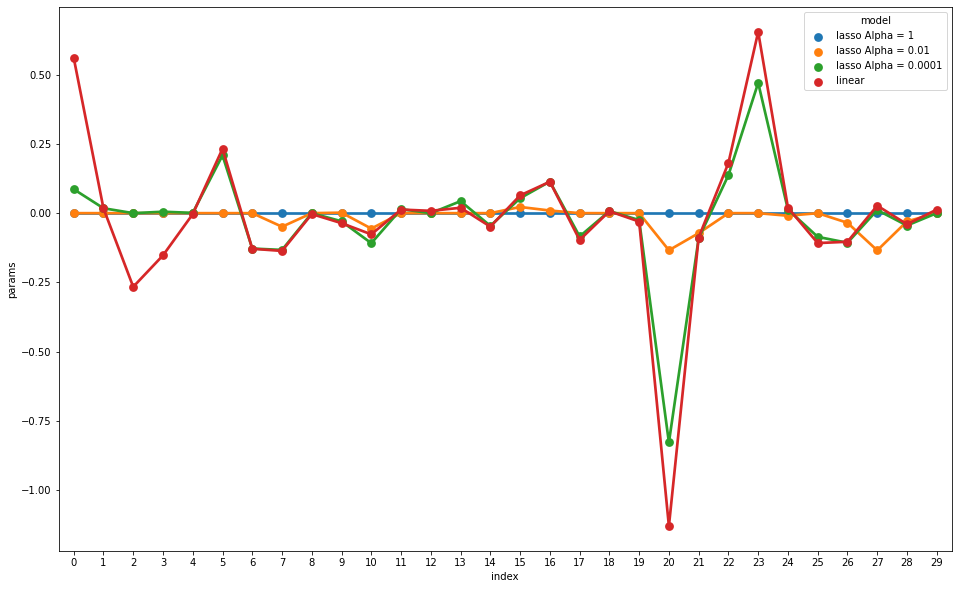

In [10]:
perf_lasso1 = pd.DataFrame({"params": lasso1.coef_, 
                                       "model": "lasso Alpha = 1", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso2 = pd.DataFrame({"params": lasso2.coef_, 
                                       "model": "lasso Alpha = 0.01", 
                                       "index": range(0, len(cancer_df.columns))})

perf_lasso3 = pd.DataFrame({"params": lasso3.coef_, 
                                       "model": "lasso Alpha = 0.0001", 
                                       "index": range(0, len(cancer_df.columns))})


perf_lin = pd.DataFrame({"params": lin.coef_[0], 
                                       "model": "linear", 
                                       "index": range(0, len(cancer_df.columns))})

perf_compar = pd.concat([perf_lasso1,perf_lasso2,perf_lasso3,perf_lin])

import seaborn as s

plt.figure(figsize=(16, 10))
s.pointplot(x = 'index',y = 'params',hue = 'model', style = 'model', data = perf_compar)

In [8]:
lasso1.coef_

array([-0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,
       -0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.])

In [9]:
lasso2.coef_

array([-0.01665077, -0.0333855 , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.03062753, -0.        ,  0.02204685,
       -0.01835945, -0.        , -0.        ,  0.        , -0.01746945,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.15700828, -0.03829302, -0.        ,  0.        , -0.02398295,
       -0.        , -0.00739445, -0.13306191, -0.04535835, -0.00994636])

In [10]:
lasso3.coef_

array([ 0.0281257 , -0.04321048, -0.02943031, -0.        , -0.00248569,
        0.24273408, -0.19222455, -0.00605187, -0.01552117, -0.00281318,
       -0.2596251 , -0.01142487,  0.14246747,  0.06820789, -0.03201528,
       -0.07248005,  0.10488158, -0.03066757, -0.0042206 ,  0.04596878,
       -0.55686709, -0.00731304, -0.14893075,  0.49890214, -0.0323993 ,
        0.01970127, -0.00711376, -0.09552509, -0.04059204, -0.1147485 ])

In [14]:
from sklearn.model_selection import GridSearchCV

params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 10)

grid.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.159105847223243, tolerance: 0.008105027932960892
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6730961576367847, tolerance: 0.008223463687150842
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.372770519489526, tolerance: 0.008306424581005585
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
params

{'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09]}

In [15]:
grid.best_params_

{'alpha': 0.001}

In [16]:
grid.best_estimator_.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.32731303e-02,
        5.62459220e-05,  1.50445496e-01, -6.82333875e-02, -1.23021197e-01,
        0.00000000e+00,  0.00000000e+00, -1.18915482e-01,  5.89575167e-03,
        0.00000000e+00,  5.20944189e-02, -3.55463047e-02,  2.78699063e-02,
        1.11207901e-01, -6.73557535e-02,  5.68135523e-03, -1.10082896e-02,
       -4.72617132e-01, -6.98067388e-02,  0.00000000e+00,  2.95331263e-01,
       -0.00000000e+00, -1.36185331e-02, -1.42039885e-01, -1.08822028e-02,
       -4.71764530e-02, -2.87246418e-02])

In [18]:
grid.best_estimator_.score(X_train,y_train)

0.7716016899930515